In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
from matplotlib import pyplot as plt
from core import *
import os

plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
cmap = sn.color_palette("viridis", 8, as_cmap=True)
from multiple_testing import generate_fake_data

%load_ext autoreload
%autoreload 2

In [4]:
import pickle

with open(
    "states/nruns=30_T=300_N=200_n_jumps=10_level_bounds=2_min_gaps=0_partial_effect_ratio=1_heavy_tail=False_poission_corruption=False_J=0.8_staircase=False_RegX=True.pickle",
    "rb",
) as pickle_file:
    content = pickle.load(pickle_file)

In [5]:
stored_selections, Y, real_jump_idces = content[0]

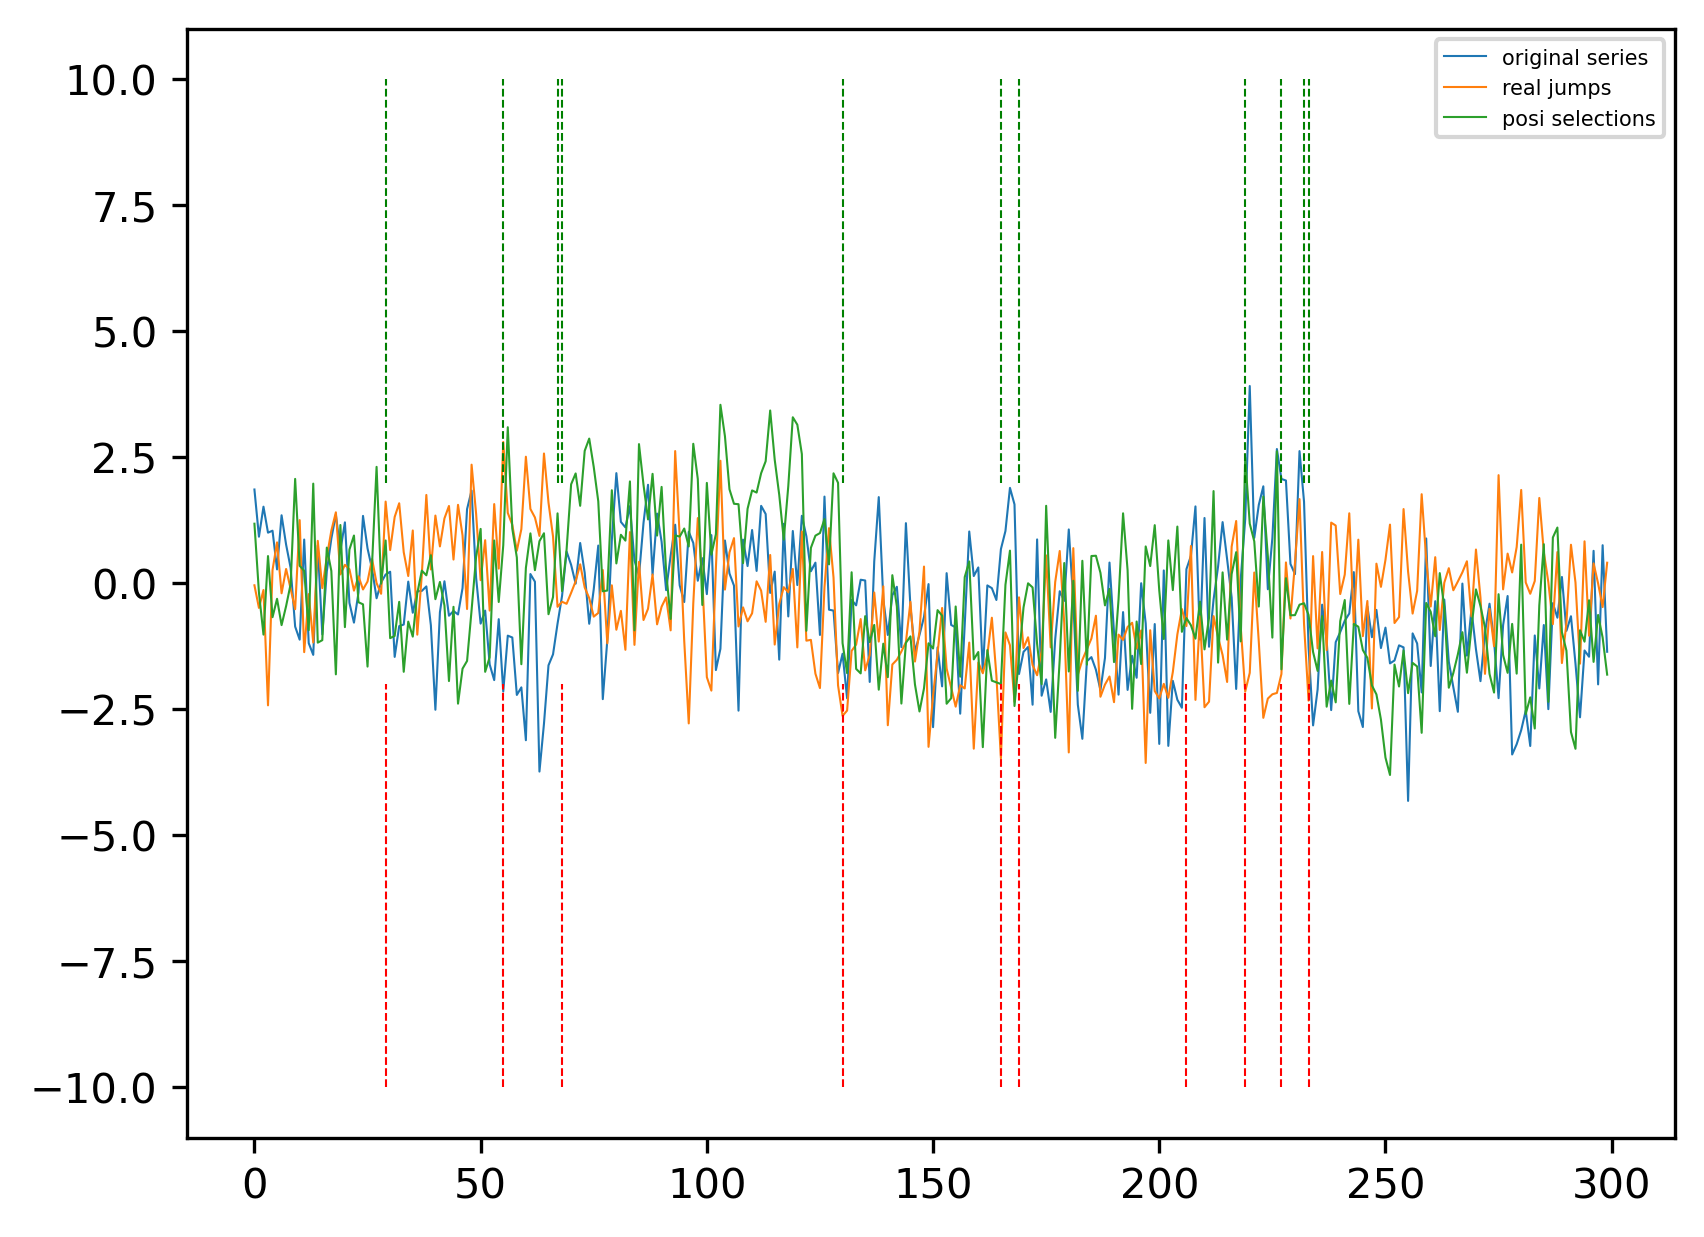

In [7]:
plt.plot(Y[:, :3], linewidth=0.5)
plt.vlines(
    real_jump_idces, ymin=-10, ymax=-2, colors="r", linestyles="--", linewidth=0.5
)
plt.vlines(
    stored_selections[0.05][0],
    ymin=2,
    ymax=10,
    colors="g",
    linestyles="--",
    linewidth=0.5,
)
plt.legend(["original series", "real jumps", "posi selections"], fontsize=5)

In [8]:
from core import cv_lasso

In [9]:
pvals_list = []
pval_idx = []
alphas = []
T = 300
X = np.tril(np.ones((T, T)), k=0)
idces = [2, 3, 4]

for i in range(200):
    lam = cv_lasso(Y[:, i], X)
    alphas.append(lam)
    # adjust the lambdas between sklearn and selectinf
    lam_adjusted = lam * T
    L = lasso.gaussian(X, Y[:, i], lam_adjusted)
    L.fit()
    pval = np.array([np.nan] * T)
    significant_index = []
    if len(L.summary()) > 0:
        significant_index = L.summary()["variable"].values
        pval[significant_index] = L.summary()["pvalue"].values

    pval_idx.append(significant_index)
    pvals_list.append(pval)


/home/ynf/anaconda3/envs/cc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.620e-02, tolerance: 4.934e-02
  model = cd_fast.enet_coordinate_descent(
/home/ynf/anaconda3/envs/cc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.999e-02, tolerance: 4.934e-02
  model = cd_fast.enet_coordinate_descent(
/home/ynf/anaconda3/envs/cc/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [16]:
with open(f"states/temp_plots_p_full.pickle", "wb") as handle:
    pickle.dump(pvals_list, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(f"states/temp_plots_p_index.pickle", "wb") as handle:
    pickle.dump(pval_idx, handle, protocol=pickle.HIGHEST_PROTOCOL)

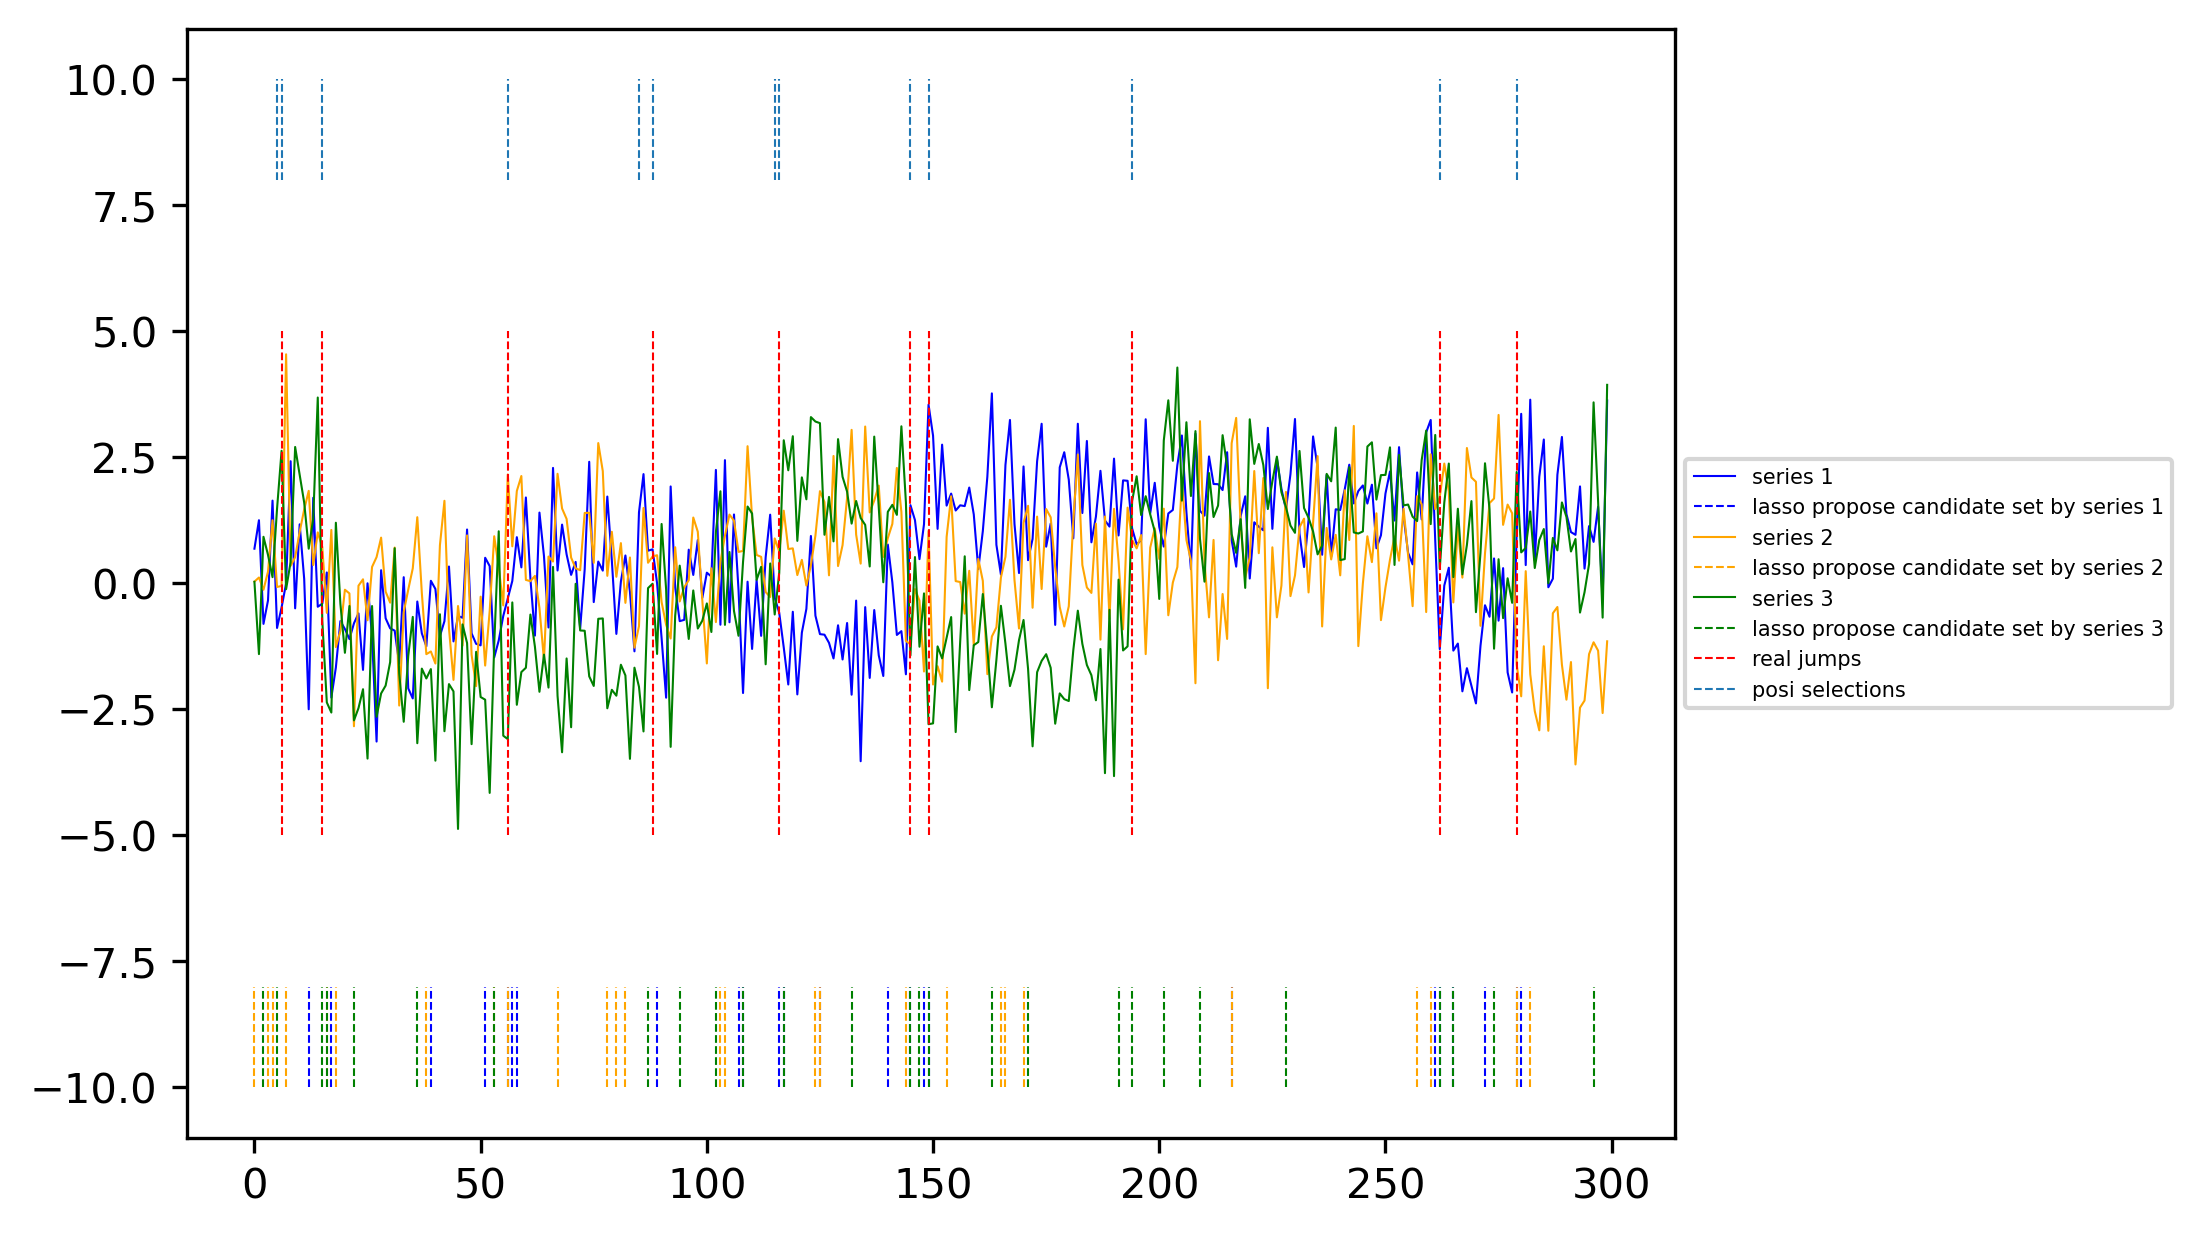

In [7]:
c = ["blue", "orange", "green"]
for i in range(3):
    plt.plot(Y[:, idces[i]], linewidth=0.5, c=c[i])
    plt.vlines(
        pvals_list[i], colors=c[i], ymin=-10, ymax=-8, linestyles="--", linewidth=0.5
    )

plt.vlines(real_jump_idces, ymin=-5, ymax=5, colors="r", linestyles="--", linewidth=0.5)
plt.vlines(stored_selections[0.05][0], ymin=8, ymax=10, linestyles="--", linewidth=0.5)
plt.legend(
    [
        "series 1",
        "lasso propose candidate set by series 1",
        "series 2",
        "lasso propose candidate set by series 2",
        "series 3",
        "lasso propose candidate set by series 3",
        "real jumps",
        "posi selections",
    ],
    fontsize=5,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)